In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Beschreibende Statistik

## Übersicht

#### Lagemaß
#### Streuung
#### Graphiken
#### <span style="color:blue">Mehrdimensionale Daten</span>
- <span style="color:blue">Diskrete Verteilung</span>
- <span style="color:blue">Kontinuierliche Verteilung</span>

#### Abhängigkeit

## Bivariate Stichproben 二元随机变量

#### Beispiele:

- zwei Würfel
- Strom und Spannung
- Luftdruck und Höhe über Meer
- Regentropfen auf Blatt Papier (Koordinaten x und y)


# Diskrete Verteilung

### Kontingenztafel der *absoluten* Häufigkeiten

In [3]:
print('===    two coins    ===')
results = [[0, 1], [1, 1], [1, 1], [0, 0], [1, 0], [1, 1], [1, 1], [0, 1],
           [1, 1], [1, 0], [0, 1], [0, 0], [0, 1], [1, 0], [1, 0], [0, 0],
           [0, 1], [0, 0], [1, 1], [0, 0] ]
print('#1 \ #2 | head | tail |')
print('-----------------------')                                  # calculate numbers
print('head    |{:5d} |{:5d} |'.format(results.count([0, 0]), results.count([0, 1])))
print('tail    |{:5d} |{:5d} |'.format(results.count([1, 0]), results.count([1, 1])))

===    two coins    ===
#1 \ #2 | head | tail |
-----------------------
head    |    5 |    5 |
tail    |    4 |    6 |


### ... mit *Randverteilung*

In [4]:
'''calculate absolute frequencies (Python list)'''
n11 = results.count([0, 0])
n12 = results.count([0, 1])
n21 = results.count([1, 0])
n22 = results.count([1, 1])
print('#1 \ #2| head | tail ||  sum  ')
print('------------------------------')
print('head   |{:5d} |{:5d} ||{:5d} '.format(  n11,     n12,   n11+n12))
print('tail   |{:5d} |{:5d} ||{:5d} '.format(  n21,     n22,   n21+n22))
print('==============================')
print('sum    |{:5d} |{:5d} ||{:5d} '.format(n11+n21, n12+n22, n11+n12+n21+n22))

#1 \ #2| head | tail ||  sum  
------------------------------
head   |    5 |    5 ||   10 
tail   |    4 |    6 ||   10 
sum    |    9 |   11 ||   20 


In [6]:
'''calculate absolute frequencies (numpy ndarray)'''
npres = np.array(results)               # convert data to ndarray
n11 = (npres==[0, 0]).all(axis=1).sum() # comparing (2val)-array => boolean array
n12 = (npres==[0, 1]).all(axis=1).sum() # ... only if both are True ("all")
n21 = (npres==[1, 0]).all(axis=1).sum() # ... then count as "1" (else False="0")
n22 = (npres==[1, 1]).all(axis=1).sum() # ... summing up these gives total number
print('#1 \ #2| head | tail ||  sum  ')
print('------------------------------')
print('head   |{:5d} |{:5d} ||{:5d} '.format(  n11,     n12,   n11+n12))
print('tail   |{:5d} |{:5d} ||{:5d} '.format(  n21,     n22,   n21+n22))
print('==============================')
print('sum    |{:5d} |{:5d} ||{:5d} '.format(n11+n21, n12+n22, n11+n12+n21+n22))

#1 \ #2| head | tail ||  sum  
------------------------------
head   |    5 |    5 ||   10 
tail   |    4 |    6 ||   10 
sum    |    9 |   11 ||   20 


### *relative* Häufigkeiten

<br>

$$f_{ij}=\frac{h_{ij}}{n} \qquad f\in[0, 1]$$

In [7]:
'''calculate relative frequencies (numpy ndarray to list)'''
nprel = np.array(results)                 # place holder for calculating relative frequency
n = nprel.shape[0]                        # number of value(pairs): 1st dimension of shape
f11 = nprel.tolist().count([0, 0])/n      # since a list again,
f12 = nprel.tolist().count([0, 1])/n      # ... we can count
f21 = nprel.tolist().count([1, 0])/n      # ... different elements
f22 = nprel.tolist().count([1, 1])/n      # ... as before
print('#1 \ #2| head | tail ||  sum  ')
print('------------------------------')
print('head   |{:5.2f} |{:5.2f} ||{:5.2f} '.format(  f11,     f12,   f11+f12))
print('tail   |{:5.2f} |{:5.2f} ||{:5.2f} '.format(  f21,     f22,   f21+f22))
print('==============================')
print('sum    |{:5.2f} |{:5.2f} ||{:5.2f} '.format(f11+f21, f12+f22, f11+f12+f21+f22))

#1 \ #2| head | tail ||  sum  
------------------------------
head   | 0.25 | 0.25 || 0.50 
tail   | 0.20 | 0.30 || 0.50 
sum    | 0.45 | 0.55 || 1.00 


# Kontinuierliche Verteilung

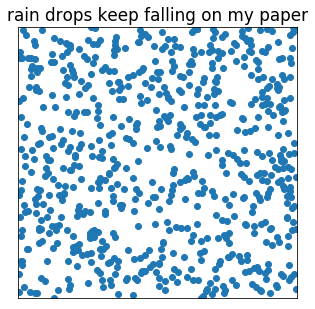

In [8]:
'''Two dimensional random variable: raindrops on a paper'''
f = plt.figure(figsize=(5, 5))          # square 
np.random.seed(987654)                  # initialize random generator to same
rain = np.random.random((2, 700))       # draw 2x700  [0...1] random numbers
plt.scatter(rain[0], rain[1])           # let it rain
plt.axis([0, 1, 0, 1])                  # (restrict frame)
plt.title('rain drops keep falling on my paper') # (headline)
ax = plt.gca()                          # (get instance of axes drawn)
ax.axes.get_xaxis().set_visible(False)  # (no tickmarks on x)
ax.axes.get_yaxis().set_visible(False); # (            and y axis)

# Streudiagramm mit Randverteilung

der einzelnen Komponenten (Dimensionen)

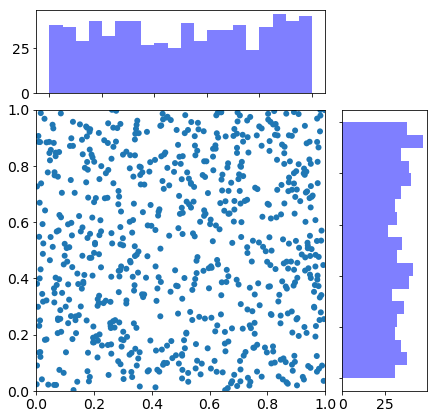

In [10]:
'''three sub-graph-axis-sets: axmx, axmy and axxy in one figure'''
fig = plt.figure(figsize=(7, 7))
bins = np.linspace(0.0, 1.0, 21)                                # 20 bins from 0 to 1
# define a 4x4 grid and distribute the virtual squares:
axmx = plt.subplot2grid((4, 4), (0, 0), colspan=3)              # upper marginal 3x1, until 3rd column
axmy = plt.subplot2grid((4, 4), (1, 3), rowspan=3)              # right marginal 1x3, start 2nd row, last col
axxy = plt.subplot2grid((4, 4), (1, 0), colspan=3, rowspan=3)   # main window, size 3x3, start 2nd row
axmx.hist(rain[0], color='b', bins=bins, label='x', alpha=.5)   # x-marginal histogram
axmy.hist(rain[1], color='b', bins=bins, label='y', alpha=.5,
            orientation='horizontal')                           # y-marginal, rotated
axxy.scatter(rain[0], rain[1], edgecolor='')                    # let it rain in big xy-panel
axmx.xaxis.set_ticklabels([])                                   # no tickmarks
axmy.yaxis.set_ticklabels([])
axxy.axis([0, 1, 0, 1]);                                        # restrict area to full data range

# Kenngrößen mehrdimensionaler Daten

## Mittelwert
Randverteilung erlaubt Bestimmung des 2D-Mittelwerts

## Varianz
Randverteilung erlaubt Bestimmung der 2D-Streuung(en)

> es sollt auch in 2D

In [11]:
print('the mean of rain-X is {:.2f}'.format(rain[0].mean()))
print('the mean of rain-Y is {:.2f}'.format(rain[1].mean()))

the mean of rain-X is 0.51
the mean of rain-Y is 0.51


In [12]:
print('the variance of rain-X is {:.2f}'.format(rain[0].var()))
print('the variance of rain-Y is {:.2f}'.format(rain[1].var()))

the variance of rain-X is 0.09
the variance of rain-Y is 0.09


## seaborn - weitere Bibliothek zur Datenexploration

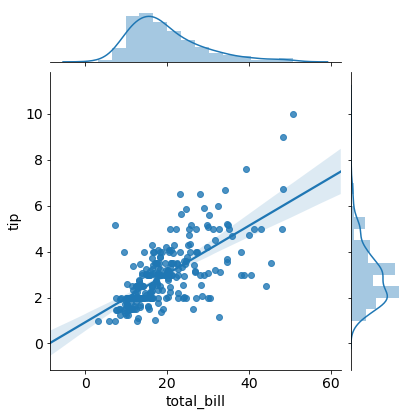

In [5]:
'''seaborn allows easy data exploration'''
import seaborn as sns
tips = sns.load_dataset("tips")    # Load one of the data sets that come with seaborn
sns.jointplot("total_bill", "tip", tips, kind='reg');

## Dichte-Verteilung: 2D-Histogramm
Bei zu vielen Datenpunkten gibt es analog zum eindimensionalen Fall *Histogramm* die Möglichkeit in die dritte Dimension *z* die Häufigkeitsverteilung aufzutragen.

Matplotlib hat dazu `hist2d` farbkodiert.

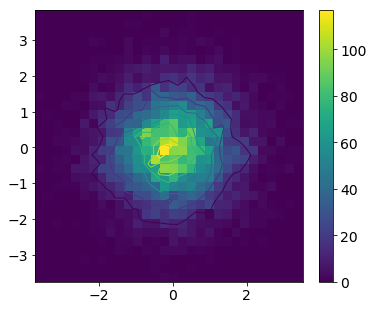

In [6]:
'''two dimensional density plot'''
x1 = np.random.normal(size=10000)             # random x values
x2 = np.random.normal(size=10000)             # random y values
f = plt.figure(figsize=(6, 5)) 
counts, xbins, ybins, image = plt.hist2d(x1, x2, bins=[30,30])  # counts-matrix
plt.colorbar()                                # visualize translation color-number
plt.contour(xbins[:-1], ybins[:-1], counts.T, linewidths=1); # to use for contours

    plt.hist2d?

## 3D-Darstellung

#### zweidimensionale Basis:  $y = f(x_1, x_2)$
Graphische Darstellung
- diskret: mit *Nadeln*
- kontinuierlich: 3D-Graphik

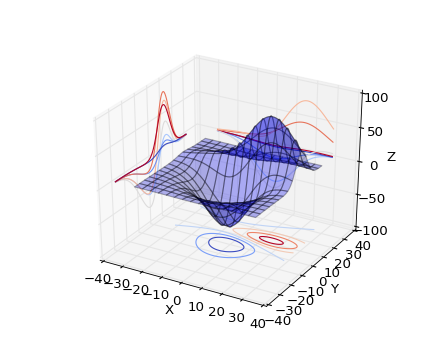

## höherdimensional
- Streumatrix

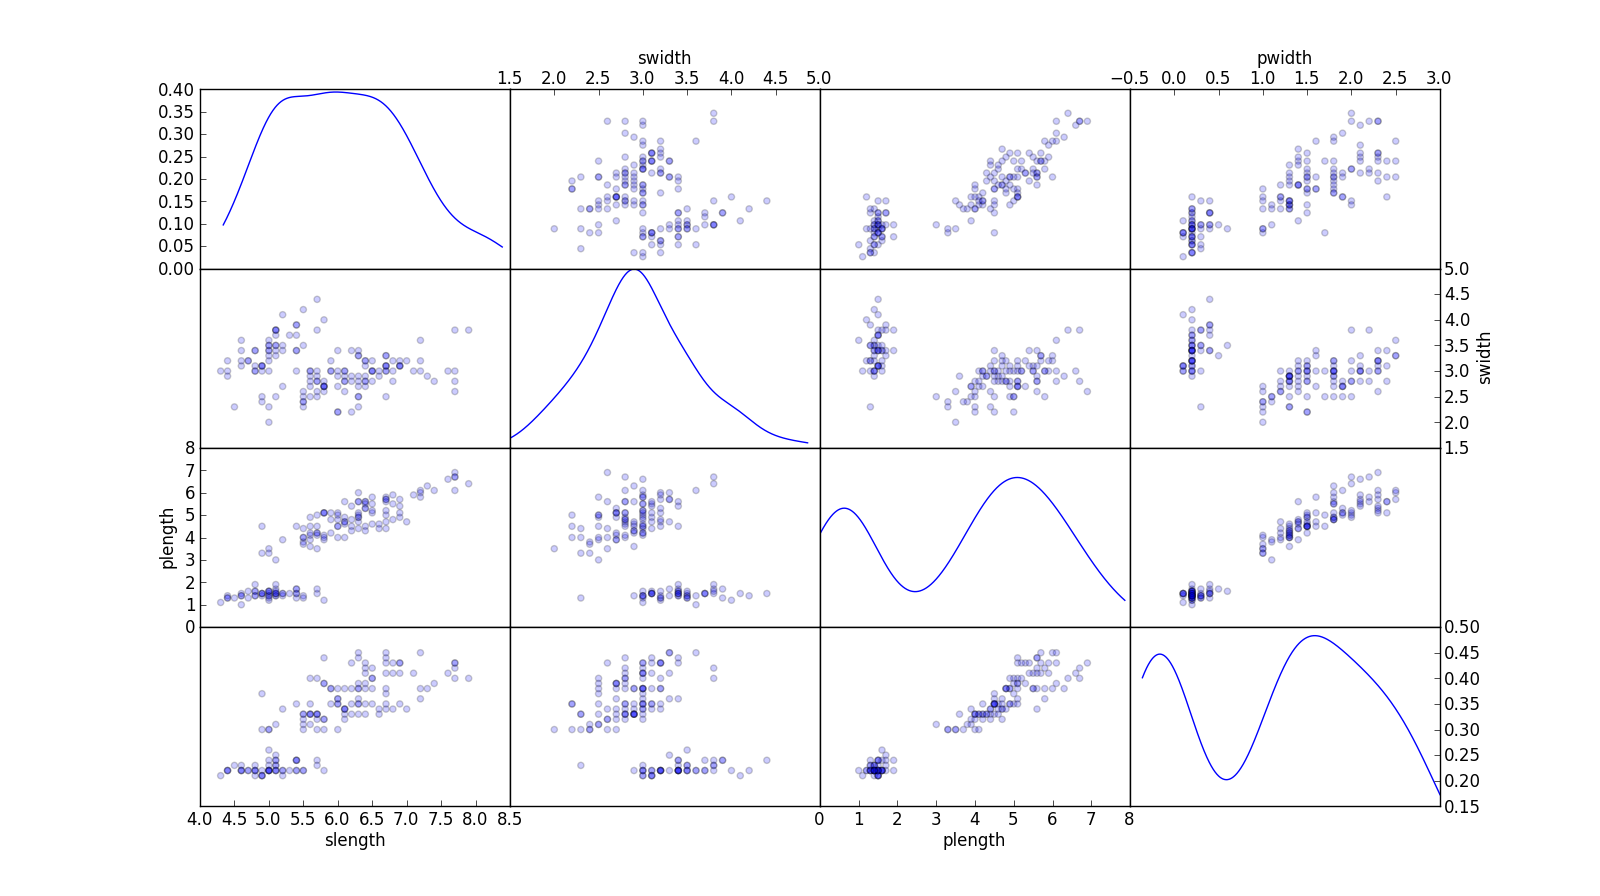

# Zusammenfassung beschreibende mehrdimensionale Statistik
- Datenreduktion Kenngrößen
    - Mittelwerte
    - Standardabweichungen
- Struktur in den Daten erkennen
    - Form der Verteilung
    - Form der Randverteilung
- Anschauliche Darstellung
    - Kontingenztabelle, Vierfeldertafel
    - 2D-Histogramm

#### Ausblick:
- Abhängigkeit mehrerer Variabler
    - Korrelation
    - Regression

# Links
- Matplotlib Graphikgalerie http://matplotlib.org/gallery.html
- Pandas Graphiken: http://pandas.pydata.org/pandas-docs/stable/visualization.html


# Fragen?